In [27]:
%reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm
from statsmodels.formula.api import ols

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


# Transforming Data for Linear Regression
* try p rasied to the (-1,-0.5, ln=0, 0.5, 1, 1.5, 2)

* Look at the histogram of the residuals

Right (positive skew): \
square root transformation \
log transformation \
reciprocal transformation 

Left (negative) skew:\
square transformation \
exponential transformation 

* If linearity is the problem:  transform the predictor
* If linearity and or equality of variance are the problem:  transform the response or both

* Careful about negative numbers in your data with transformations

* Remember that your model is now in transformed values.

# Read in Wordrecall csv

In [28]:
word=pd.read_csv('WordRecall.csv')
word

,time,prop,ln(time)
0,1,0.84,0.000000
1,5,0.71,1.609438
2,15,0.61,2.708050
3,30,0.56,3.401197
4,60,0.54,4.094345
5,120,0.47,4.787492
6,240,0.45,5.480639
7,480,0.38,6.173786
8,720,0.36,6.579251
9,1440,0.26,7.272398


# Create a scatterplot

<AxesSubplot:xlabel='time', ylabel='prop'>

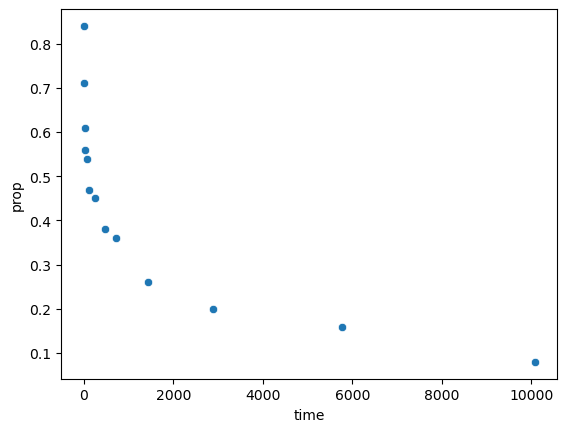

In [29]:
sns.scatterplot(x="time",y="prop",data=word)

# Explore and transform the data

In [51]:
#fit the simple linear regression model
model1=ols('prop~time',data=word)
results1=model1.fit()
print(results1.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.532   
Dependent Variable: prop             AIC:                -10.2115
Date:               2022-10-26 11:23 BIC:                -9.0816 
No. Observations:   13               Log-Likelihood:     7.1057  
Df Model:           1                F-statistic:        14.63   
Df Residuals:       11               Prob (F-statistic): 0.00282 
R-squared:          0.571            Scale:              0.023190
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept      0.5259    0.0488  10.7745  0.0000   0.4184   0.6333
time          -0.0001    0.0000  -3.8253  0.0028  -0.0001  -0.0000
-----------------------------------------------------------------
Omnibus:              1.823        Durbin-Watson:           0.320
Prob(Omnibus):        

C:\Users\carol\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


eval_env: 1


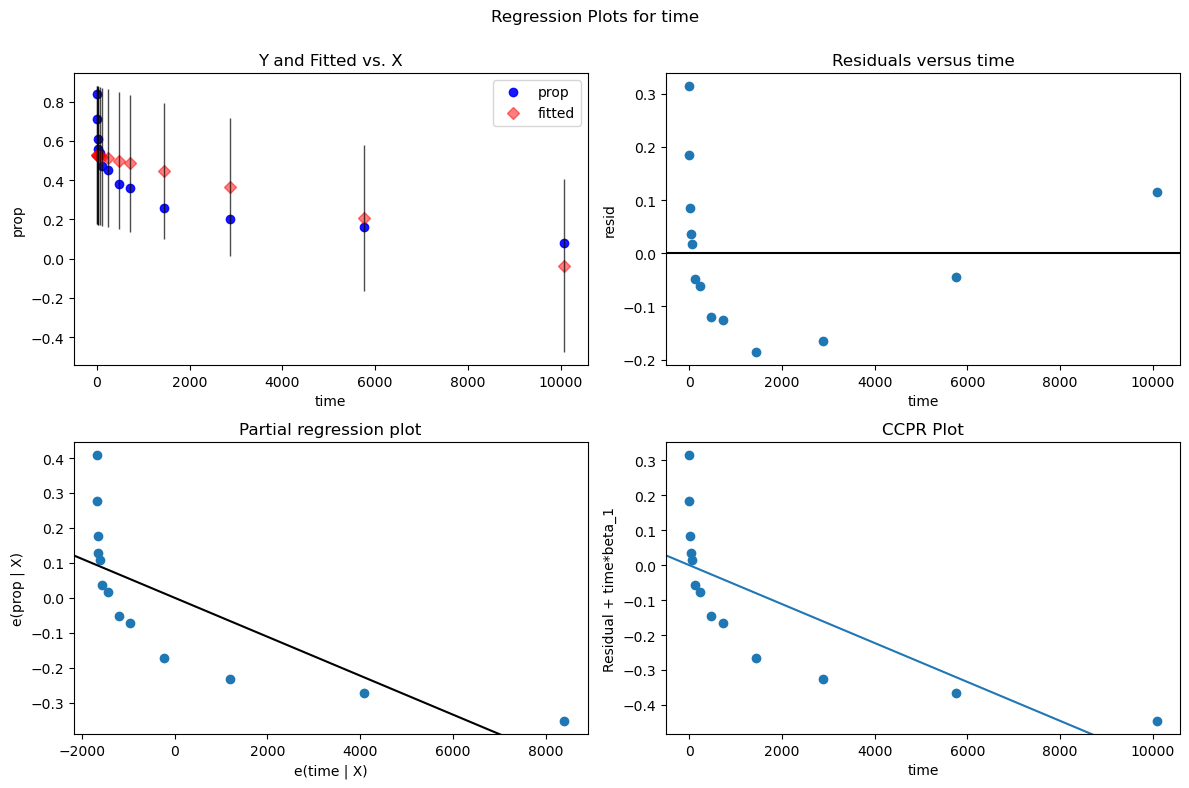

In [31]:
fig=plt.figure(figsize=(12,8))
fig=sm.graphics.plot_regress_exog(results1,'time',fig=fig)

<AxesSubplot:xlabel='time', ylabel='prop'>

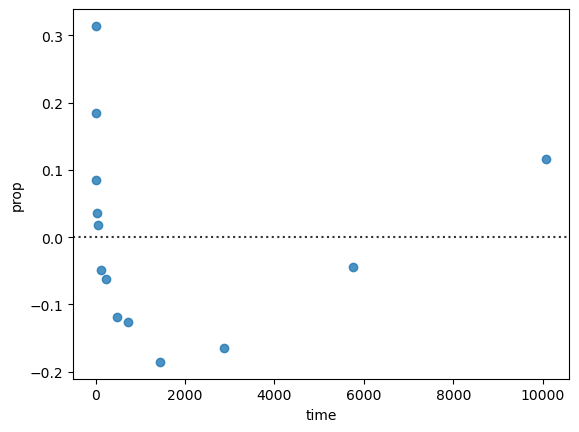

In [32]:
sns.residplot(x="time",y="prop",data=word)

<AxesSubplot:ylabel='Density'>

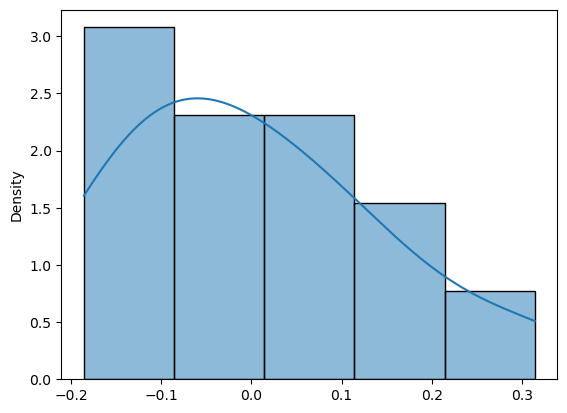

In [33]:
# right skewed data: positive skew
sns.histplot(x=results1.resid, stat='density',kde=True)

# Create a new, transformed scatterplot

In [38]:
time1=np.log(word['time'])
word["time1"]=time1

Text(0, 0.5, 'prop')

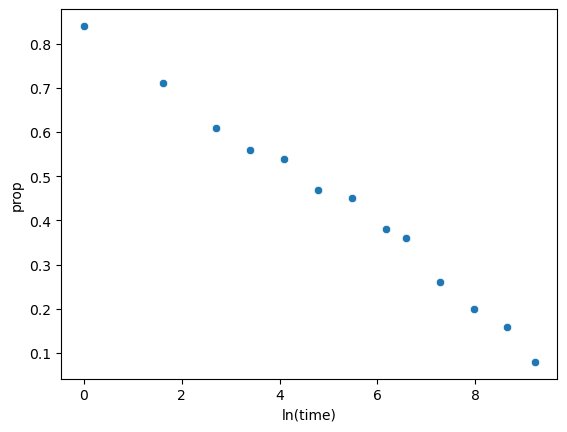

In [39]:
sns.scatterplot(x="time1",y="prop",data=word)
plt.xlabel("ln(time)")
plt.ylabel("prop")

In [62]:
#fit the simple linear regression model with the transformed predictor
model2=ols('prop~time1',word)
results2=model2.fit()
print(results2.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.989     
Dependent Variable: prop             AIC:                -58.9230  
Date:               2022-10-26 11:58 BIC:                -57.7931  
No. Observations:   13               Log-Likelihood:     31.462    
Df Model:           1                F-statistic:        1076.     
Df Residuals:       11               Prob (F-statistic): 2.53e-12  
R-squared:          0.990            Scale:              0.00054700
--------------------------------------------------------------------
                Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
--------------------------------------------------------------------
Intercept       0.8464    0.0142   59.6283  0.0000   0.8152   0.8777
time1          -0.0792    0.0024  -32.7979  0.0000  -0.0845  -0.0739
-------------------------------------------------------------------
Omnibus:                0.681        Durbin-Watson:          

C:\Users\carol\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


eval_env: 1


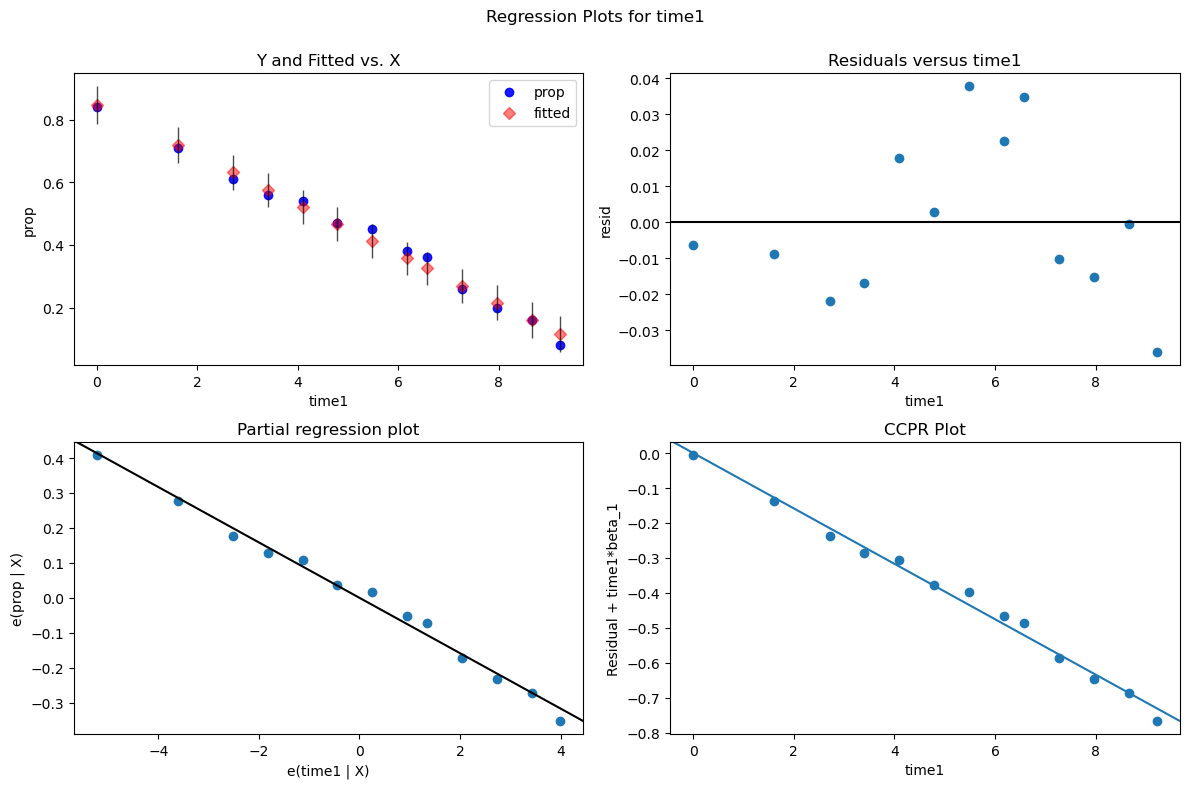

In [63]:
fig=plt.figure(figsize=(12,8))
fig=sm.graphics.plot_regress_exog(results2,'time1',fig=fig)

# Explore for normality of residuals

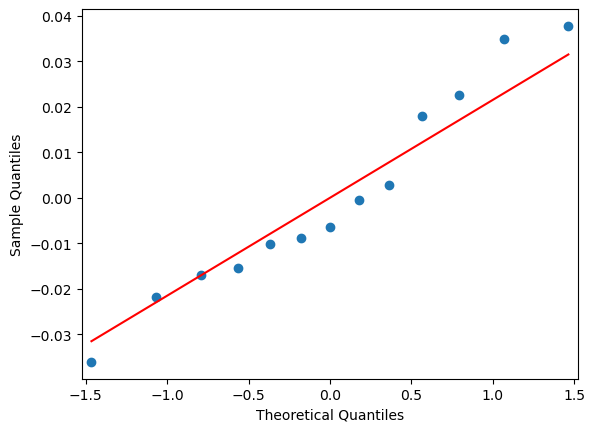

In [64]:
sm.qqplot(results2.resid,line='s')
plt.show()

In [65]:
stats.shapiro(results2.resid)

ShapiroResult(statistic=0.9496892690658569, pvalue=0.5935889482498169)

<AxesSubplot:ylabel='Density'>

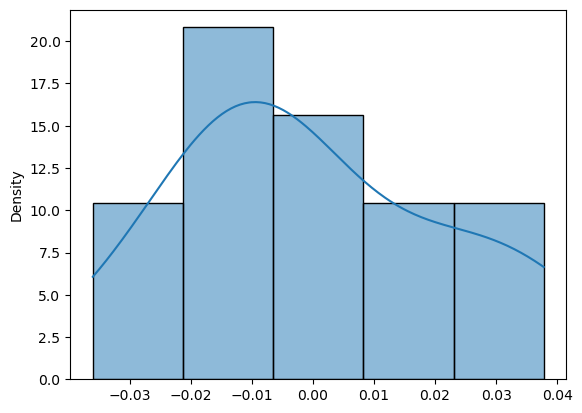

In [66]:
sns.histplot(x=results2.resid, stat='density',kde=True)

# Create the final regression plot

Text(0, 0.5, 'prop')

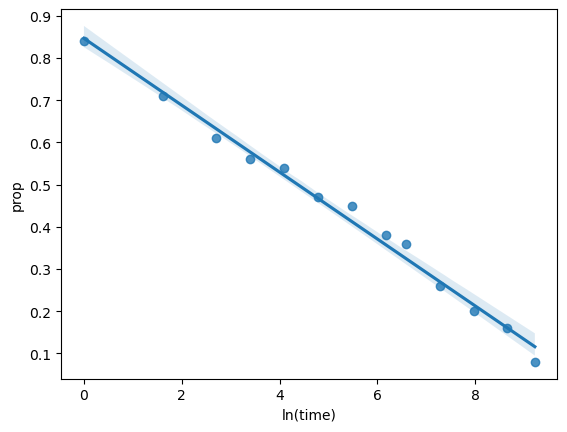

In [67]:
sns.regplot(x="time1",y="prop",data=word)
plt.xlabel("ln(time)")
plt.ylabel("prop")

In [68]:
from scipy import stats
stats.pearsonr(x=word["time1"],y=word["prop"])

PearsonRResult(statistic=-0.9949259488341928, pvalue=2.525247555534483e-12)

In [83]:
XA=([6.91])
results2.get_prediction(exog=dict(time1=XA)).summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,0.298957,0.007656,0.282108,0.315807,0.244793,0.353122
